## REGRESSION

**Question** Do you remember what the regression is?
<br>**Odpowiedź:** Regresja liniowa, to metoda opisująca współzmienność kilku zmiennych dopasowując do nich funkcję.

Today's analysis we will run on dataset 'car-mpg' which has the following columns: cylinders, displacement, horsepower, weight, acceleration, model year, origin and mpg. Mpg is decision attribute and stands for miles per gallon, which basically means the reverse of combustion (pl. spalanie). The dataset comes from https://archive.ics.uci.edu/ml/datasets/auto+mpg However, it does not have the original data, but normalized version.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f, f_oneway
import statsmodels.api as sm
%matplotlib inline

plt.style.use('ggplot')

In [5]:
data = pd.read_csv('car-mpg.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,18.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,15.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,18.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,16.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,17.0


As the first step of the task let's get to know with our data and its distribution.

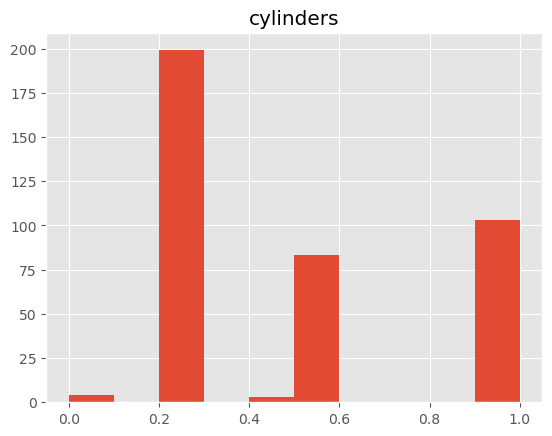

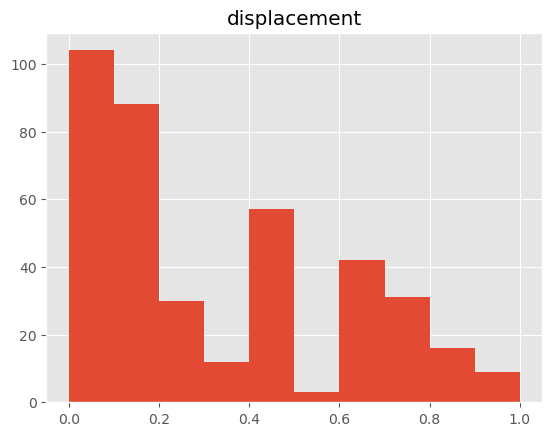

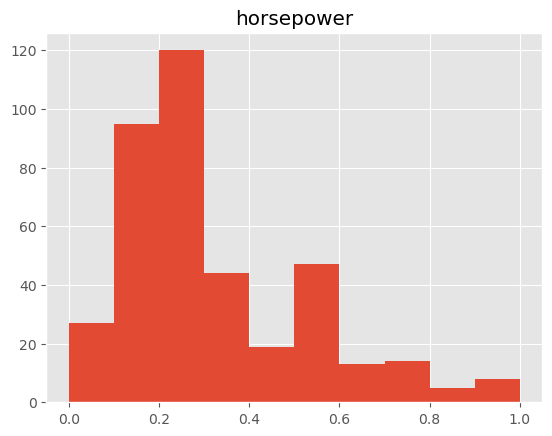

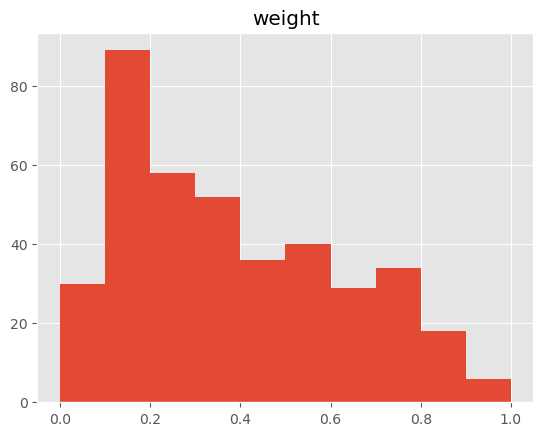

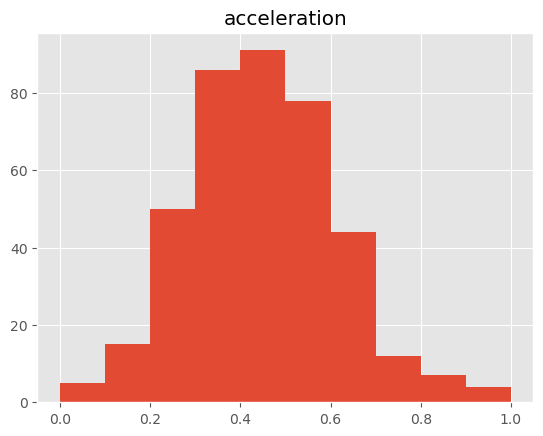

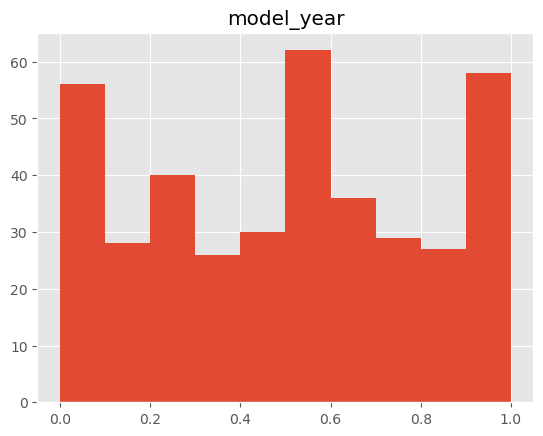

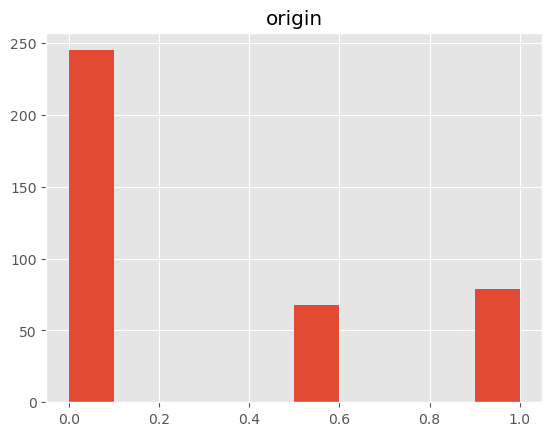

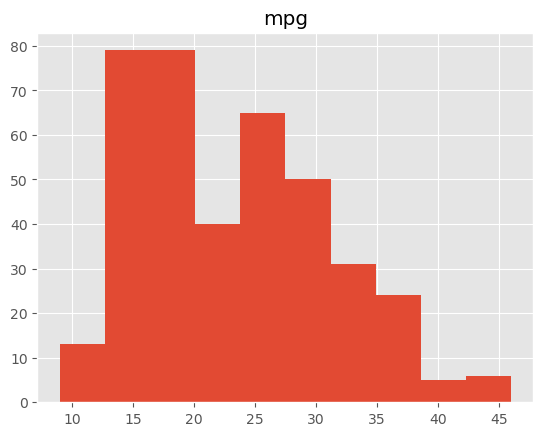

In [ ]:
columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'mpg']

data = pd.read_csv("car-mpg.csv", header=None)
data.head()

# DONE Iterate through the columns (attributes) in our dataset and draw their histograms. 
# Which attributes can be potentially more interesting in further analysis? 

for i in range(len(columns)):
    plt.title(columns[i])
    plt.hist(data[i])
    plt.show()



### SIMPLE LINEAR REGRESSION

**Task** Write your own function which calculates linear regression step by step and plot the results. <br/>
*Hint* If you do not remember how it was calculated, look here: https://en.wikipedia.org/wiki/Simple_linear_regression

In [ ]:
def LinearRegressionOne(x, y):
    #DONE write your linear regression function
    numerator = 0
    denominator = 0
    for i in range(len(x)):
        numerator += (x[i]-x.mean())*(y[i]-y.mean())
        denominator += pow((x[i]-x.mean()),2)
    b = numerator/denominator
    a = y.mean() - b*x.mean()

    return a,b # return parameters a and b of your linear function

In [ ]:
LinearRegressionOne(data[2], data[7]) # DONE run your function on attributes 'horsepower' and 'mpg'

(np.float64(32.45397418066426), np.float64(-28.860049132825566))

**Task** As you already wrote your own function which calculates simple linear regression, you can now use implementation from sklearn package. This time split your data to train and test set (use first 40 observations as test ones) and plot your results. Compare the results from your own implementation and this one from sklearn. Did you get similar coefficients for your linear function?

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# DONE simple linear regression with the usage of sklearn
def LinearRegressionOneScikit(x, y):
    x = np.array(x).reshape(-1,1)
    y = np.array(y).reshape(-1,1)

    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=104, test_size=0.10, shuffle=True)
    regression = LinearRegression().fit(x_train, y_train)

    a = regression.intercept_
    b = regression.coef_
    return a,b

LinearRegressionOneScikit(data[2], data[7])

(array([32.38401724]), array([[-28.6745606]]))

#### Polynomial regression

We do not have to limit to only simple line but we also can create some other shapes. Run the following codes:

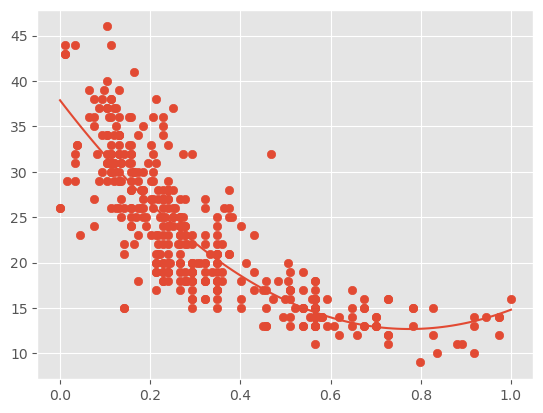

In [43]:
pd.options.mode.chained_assignment = None  # default='warn'
x = data.iloc[:,2:3]
y = data.iloc[:,-1]

x[10] = x[2]**2  # 'x^2'

reg = linear_model.LinearRegression().fit(x.to_numpy(),y)
score = reg.score(x,y)

x_line = np.array(np.linspace(0,1,100))
y_line = reg.coef_[1]*x_line**2+ reg.coef_[0]*x_line+ reg.intercept_

plt.scatter(x[2],y)
plt.plot(x_line,y_line)

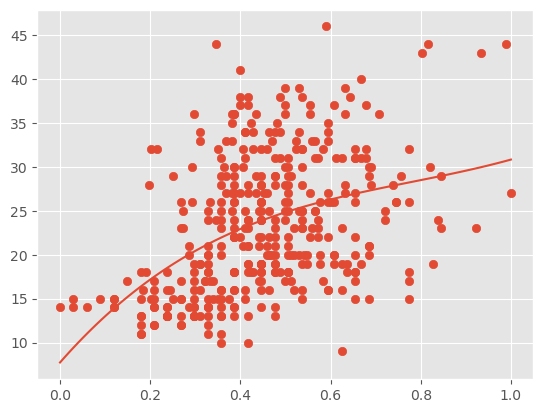

In [44]:
x = data.iloc[:,4:5]
y = data.iloc[:,-1]

x[10]=x[4]**2  # 'x^2'
x[11]=x[4]**3  # 'x^3'

reg = linear_model.LinearRegression().fit(x,y)
score = reg.score(x,y)

x_line = np.array(np.linspace(0,1,100))
y_line =  reg.coef_[2]*x_line**3+ reg.coef_[1]*x_line**2+ reg.coef_[0]*x_line+ reg.intercept_

plt.scatter(x[4],y)
plt.plot(x_line,y_line)

### MULTIPLE LINEAR REGRESSION

**Question** Do you remember how the multiple linear regression works? <br/>
**Odpowiedź:** Multiple linear regression czyli model liniowej regresji wielokrotnej to rozszerzenie regresji liniowej, w którym zmienna objaśniana zależy od więcej niż jednej zmiennej. Pozwala na przewidzneie nieliniowych związków między danymi.

#### GRADIENT DECENT ALGORITHM
Gradient descent algorithm’s main objective is to minimise the cost function. It is one of the best optimisation algorithms to minimise errors (difference of actual value and predicted value). In a real world example, it is similar to find out a best direction to take a step downhill.

**Task** This time you are about to fill missing values in multiple linear regression implementation with the usage of batch gradient descent algorithm.

In [55]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

# we add intercept to the vector of x to make it easier to process with other values
x['intercept'] = 1 

n_iterations = 3000 # DONE set the number of iterations

learning_rate = 0.25 # DONE set learning rate  

weights = np.zeros((x.shape[1], 1))

print(x.shape[0])

for _ in range(n_iterations):
    y_pred = np.dot(x, weights)
    residuals = y_pred - y
    gradient_vector = np.dot(x.T, residuals)
    weights -= learning_rate/x.shape[0] * gradient_vector

# last weight is the value of intercept 
weights

392


array([[ -1.95764629],
       [  5.9770315 ],
       [ -2.84617409],
       [-22.00751181],
       [  1.3241102 ],
       [  8.54387608],
       [  2.76450257],
       [ 26.06835299]])

**Task** You do not need to write your own implementation of multiple linear regression, you can also use sklearn implementation. This time your function should have params: independent variables *x* and dependent variable *y* and return (or just print) score and coefficients of the function (.coef_ and .intercept_).

In [59]:
def MultipleLinearRegression(x, y):
    # DONE here goes your code

    x = np.array(x)
    y = np.array(y).reshape(-1,1)

    multiple_regression = LinearRegression().fit(x, y)

    r_score = multiple_regression.score(x,y)
    a = multiple_regression.intercept_
    b = multiple_regression.coef_

    return r_score,a,b

MultipleLinearRegression(x, y)

(0.8180917738082363,
 array([25.98448797]),
 array([[ -2.63758008,   7.99990787,  -3.02421131, -22.97490448,
           1.63552668,   8.5886846 ,   2.86000053,   0.        ]]))

**Question** Compare the results from two above methods. Are they similar?
<br>**Odpowiedź**

# NIEOBOWIĄZKOWE________________________________________________________________

## SIGNIFICANCE REGRESSION COEFFICIENT

We can statistically check if the model (or specific parameter) is significant.

#### GLOBAL

**Task** Implement global test for checking significance. Fill the following methods according to your knowledge from the lecture.

In [ ]:
def getSSR(y,y_pred):
    #TODO
    return 

def getSSE(y,y_pred):
    #TODO
    return 

def getF(y, y_pred, n, m):
    #TODO
    return 

def getSignificanceRegressionCoefficient(x,y):
    #TODO
    return F,p

In [ ]:
xx = data.iloc[:,:-1].values
yy = data.iloc[:,-1:].values[:,0]

In [ ]:
F,p = getSignificanceRegressionCoefficient(xx,yy)
print(F)
if p < 0.05:
    print(" confirm " + str(p))
else:
    print(" reject " + str(p))

Let's check the correctness of your function.

In [ ]:
sm_stats = sm.OLS(yy, sm.add_constant(xx)).fit()
print(sm_stats.fvalue)

#### LOCAL

**Task** Now check the significance of each criterion. As the equation for global version is more general, we can use the function that was previously written.

In [ ]:
#TODO

## OUTLIERS

**Question** What is an outlier?

Let's look at the boxplot below. The points which are at the top and bottom of chart are outliers.

In [ ]:
fig, ax1 = plt.subplots(figsize=(3, 6))
plt.boxplot(data[4], 1)
plt.show()

The method that is used in this type of charts to determine outliers bases on quartiles. Firstly, we need to calculate IQR which stands for interquartile range and is the difference between the third and the first quartile. Usually stating the limit of whiskers is: [Q1-IQR * 1.5, Q3 + IQR * 1.5]. All values that are outside this range are treated as outliers. It is connected with normal distribution and distance greater than 3 std dev.

However, this method cannot cope correctly with multidimensional data. There can be outliers that are still close to median but overall are far from other points. 

We will use *statsmodel* package which calculates a few interesting measures.

In [ ]:
data.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'mpg']

model = sm.OLS(data.iloc[:,-1], data.iloc[:,:-1])
results = model.fit()
influence = results.get_influence()
sm_fr = influence.summary_frame()
sm_fr

**Task** Visualize residuals (*standard_resid*) with the usage of scatterplot. Draw also horizontal line on y-value = 0. Look at the chart. Are these values in a narrow row on y-value or you can identify that there are some outliers?

In [ ]:
#TODO

#### DFFITS

This measure calculates the influence of i-th example on our regression equation by omitting this observation and comparing this model to previous one. Boundary values for our influential observations are +/- 2 * sqrt(1/number of observations)

**Task** Draw a plot where you visualise values of dffits as vertical lines (see: plt.vlines()) and horizontal lines (plt.axhline()) equal to boundaries of influential observations.

In [ ]:
#TODO

**Task** Get indices of those observations that are influential for diffits.

In [ ]:
#TODO

#### COOK'S DISTANCE

Comparing to the previous, there is also made checking the influence of each observation. However, this time we check the difference of coefficients in our regression equation while we omit the i-th observation. The boundary of the influence is very often set to 4/number of observations.

**Task** Once again draw a plot where you visualise values of cooks_d as vertical lines and horizontal line equal to boundary of influential observations. *Tip* It might be useful to visualize square root of the values to make the chart more transparent.

In [ ]:
#TODO

**Task** Get indices of those observations that are influential for Cook's distance.

In [ ]:
#TODO

**Task** Check if there are elements that appear on both lists. Maybe one list is subset of the second?

In [ ]:
#TODO